In [57]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import os

%matplotlib inline

Open the path which contains all of the output files from the test data set. 

In [58]:
file_path = "/home/jlab/ExternalDrive/Seagate/Data/productionFeedback/v9_05_00_muonPath/"
files_byRun = []
for file in os.listdir(file_path):
    if ( (".root" in file) and ("result" not in file) ):
        file = file_path+file
        files_byRun.append(file)
        
fileList = r.TList() #not used for anything as yet, but nice to have
for x in files_byRun:
#    print(x)
    fi = r.TFile(x)
    fileList.Add(fi)

Using hadd.sh, we merged all of these files together into one output, which we will run through now:

In [59]:
f = r.TFile("/home/jlab/ExternalDrive/Seagate/Data/productionFeedback/v9_05_00_muonPath/result_histOnly.root") #processed output of hadd.sh
prodString="v9_05_00"

In [60]:
f.cd("farline/calo1")

True

In [61]:
f.ls()

TFile**		/home/jlab/ExternalDrive/Seagate/Data/productionFeedback/v9_05_00_muonPath/result_histOnly.root	
 TFile*		/home/jlab/ExternalDrive/Seagate/Data/productionFeedback/v9_05_00_muonPath/result_histOnly.root	
  TDirectoryFile*		farline	farline (CaloFarlineHistograms) folder
   TDirectoryFile*		calo1	calo1
    KEY: TH1D	energy;1	calo 1 energies
    KEY: TH1D	wiggle;1	calo 1 T Method
    KEY: TH1D	times;1	calo 1 hit times
    KEY: TH2D	hitPositions;1	calo 1 hit positions
    KEY: TH2D	nXtalHits;1	calo 1 n xtal hits
    KEY: TH1D	xtal0Energy;1	calo 1 xtal 0 energy
    KEY: TH1D	xtal1Energy;1	calo 1 xtal 1 energy
    KEY: TH1D	xtal2Energy;1	calo 1 xtal 2 energy
    KEY: TH1D	xtal3Energy;1	calo 1 xtal 3 energy
    KEY: TH1D	xtal4Energy;1	calo 1 xtal 4 energy
    KEY: TH1D	xtal5Energy;1	calo 1 xtal 5 energy
    KEY: TH1D	xtal6Energy;1	calo 1 xtal 6 energy
    KEY: TH1D	xtal7Energy;1	calo 1 xtal 7 energy
    KEY: TH1D	xtal8Energy;1	calo 1 xtal 8 energy
    KEY: TH1D	xtal9Energy;1	calo 1 xt

Print all of the embedded histograms.

2,098,763,780 Entries in these histograms


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./images/v9_05_00_farlineHistograms.png has been created


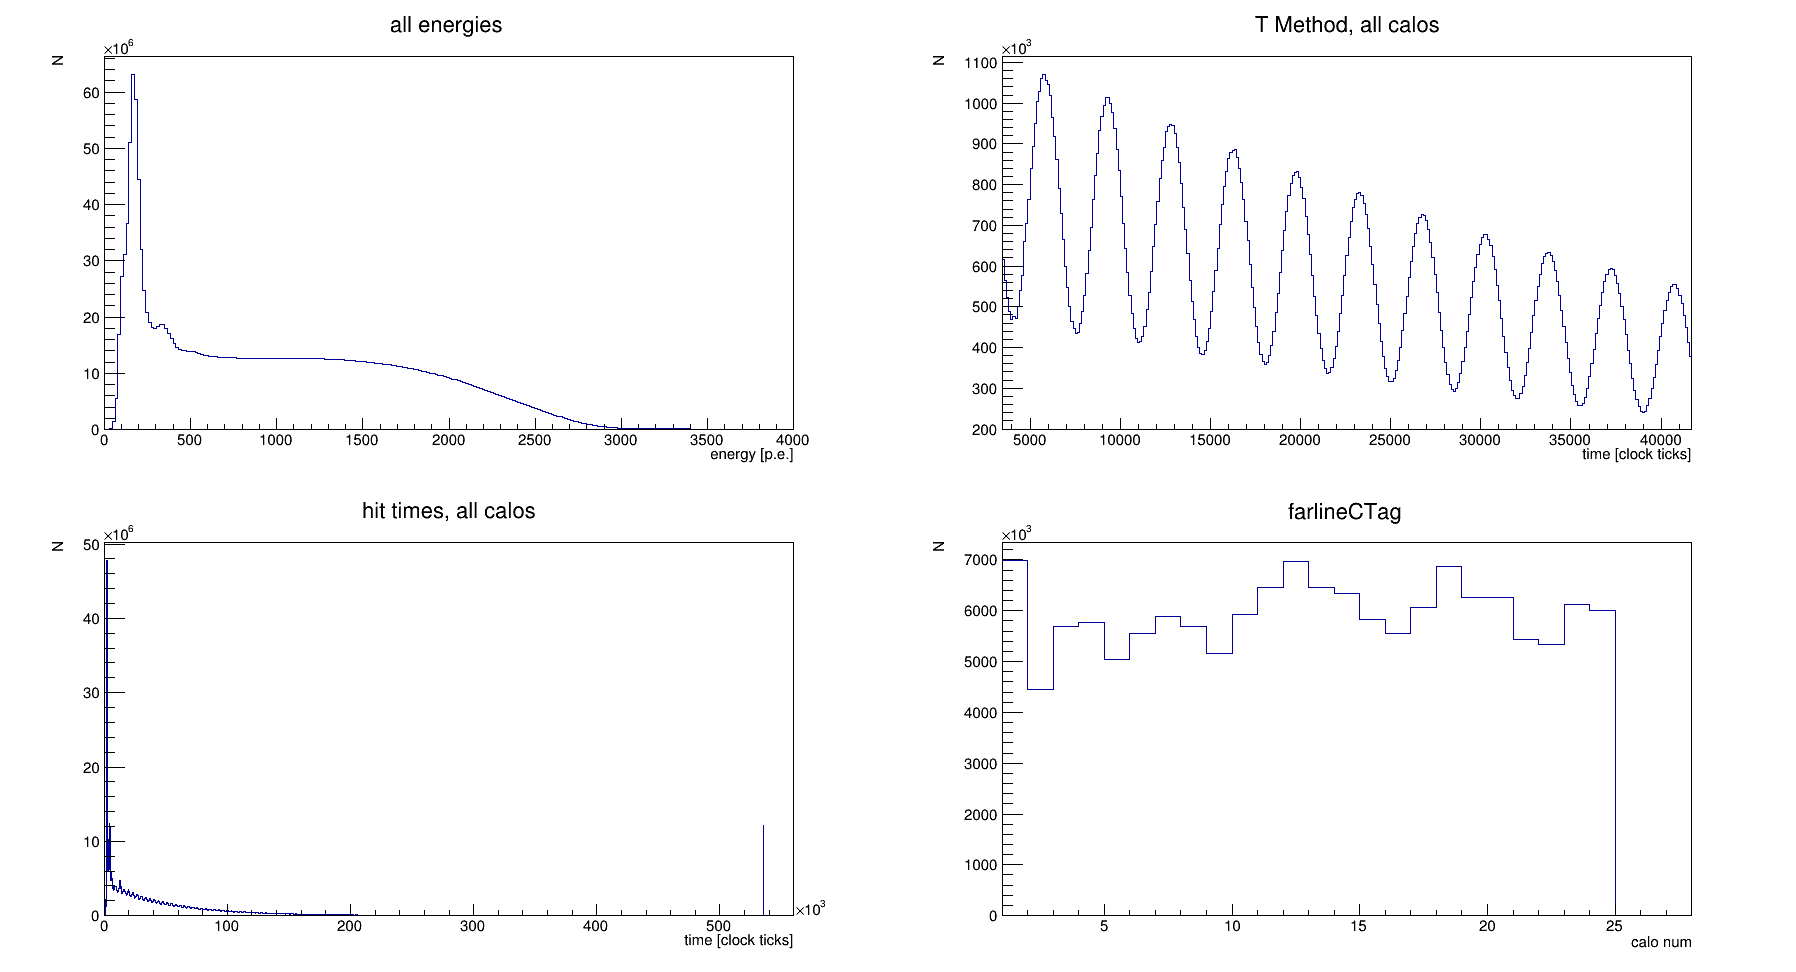

In [62]:
c = r.TCanvas("c","c",1800,1000)
c.Divide(2,2)
c.cd(1)
allCaloEnergies = f.Get("farline").Get("allCaloEnergies").Clone()
allCaloEnergies.Draw()
c.Draw()

c.cd(2)
allCaloWiggle = f.Get("farline").Get("allCaloWiggle").Clone()
allCaloWiggle.Draw()
allCaloWiggle.GetXaxis().SetRange(30,350)

c.cd(3)
allCaloTimes = f.Get("farline").Get("allCaloTimes").Clone()
allCaloTimes.Draw()

c.cd(4)
farlineCtag = f.Get("farline").Get("farlineCTag").Clone()
farlineCtag.Draw()

c.Draw()
c.Print("./images/"+prodString+"_farlineHistograms.png")

print("{:,}".format(int(allCaloEnergies.GetEntries())), "Entries in these histograms")

In [63]:
# blinded instance
getBlinded = Blinders(FitType.Omega_a, 'This is my fight song. Blinding my plot song.')
def blinded_wiggle(x, p):
    norm  = p[0]
    life  = p[1]
    asym  = p[2]
    R     = p[3]
    phi   = p[4]
    
    time  = x[0]
    omega = getBlinded.paramToFreq(R)
#    omega = myBlinder.paramToFreq(R) unblind version
    
    return norm * math.exp(-time/life) * (1 - asym*math.cos(omega*time + phi))

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [64]:
func = r.TF1("func", blinded_wiggle, 30,350,5)
func.SetParNames('N','#tau','A','R','#phi')
func.SetParameters(1500,64.4,0.4,0,0)
#func.SetParLimits(4,-0.001,2*math.pi+0.001)
func.SetLineColor(2)
func.SetNpx(1000)

0.0 560000.0
0.0 700.0
 FCN=3428.34 FROM MINOS     STATUS=SUCCESSFUL     36 CALLS        1456 TOTAL
                     EDM=7.23749e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N            8.66931e+05   1.06326e+02  -2.45224e-02  -1.85163e-10
   2  #tau         6.43269e+01   4.64565e-03   6.12086e-07   2.35189e-05
   3  A           -4.11492e-01   8.62998e-05   4.95410e-08  -6.14609e-05
   4  R           -1.13215e+01   2.60200e+00   2.80108e-04   5.33342e-08
   5  #phi         2.09311e+01   4.07756e-04   4.07756e-04  -1.00600e-04


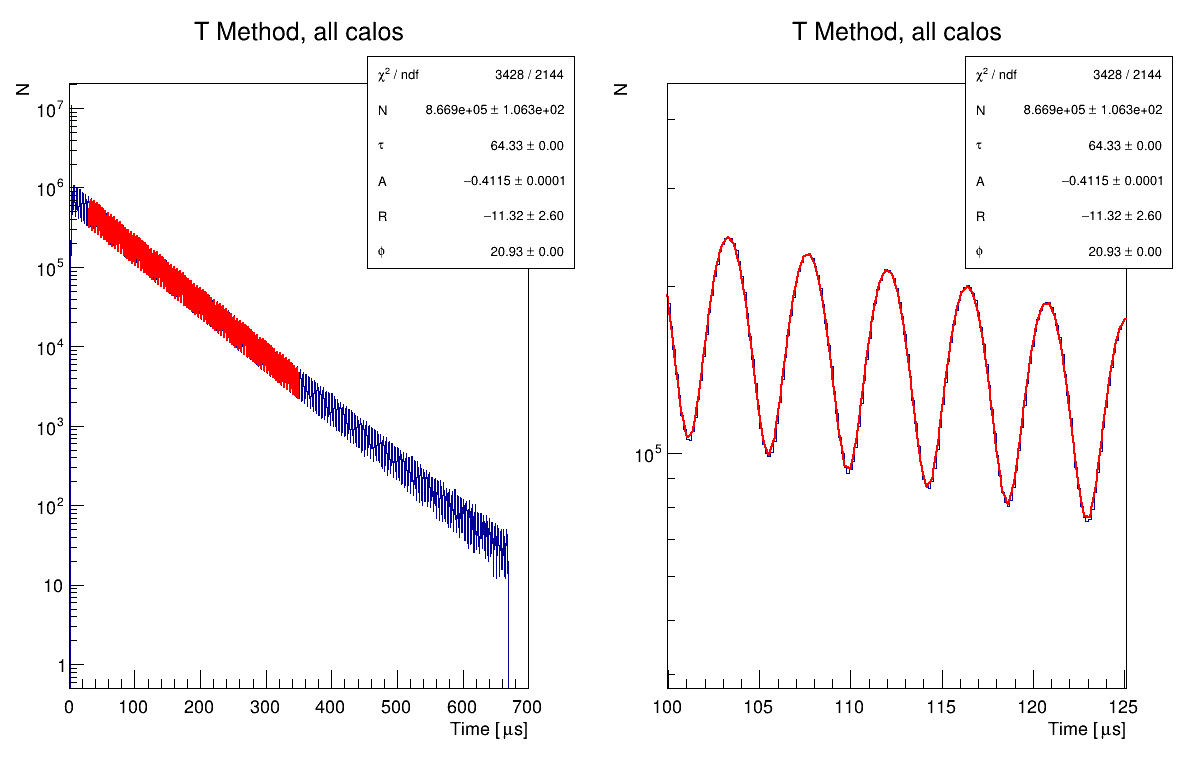

In [65]:
c2 = r.TCanvas("c2","c2",1200,800)
c2.Divide(2,1)
c2.cd(1)
r.gPad.SetLogy()

r.gStyle.SetOptFit(111)
allCaloWiggle = f.Get("farline").Get("allCaloWiggle").Clone()

print(allCaloWiggle.GetXaxis().GetXmin(),allCaloWiggle.GetXaxis().GetXmax())
allCaloWiggle.GetXaxis().SetLimits(allCaloWiggle.GetXaxis().GetXmin() / 1000 * 1.25,allCaloWiggle.GetXaxis().GetXmax() / 1000 * 1.25)
print(allCaloWiggle.GetXaxis().GetXmin(),allCaloWiggle.GetXaxis().GetXmax())
allCaloWiggle.GetXaxis().SetTitle("Time [#mus]")

residuals = allCaloWiggle.Clone() # this will be filled with the fit residuals later

allCaloWiggle.Fit("func","REM")

allCaloWiggle.Draw()

c2.cd(2)
ding =  allCaloWiggle.Clone()
ding.GetXaxis().SetRangeUser(100,125)
ding.Draw()

r.gPad.SetLogy()
c2.Draw()

Info in <TCanvas::Print>: png file ./images/v9_05_00_TmethodWiggleFitAllCalos.png has been created


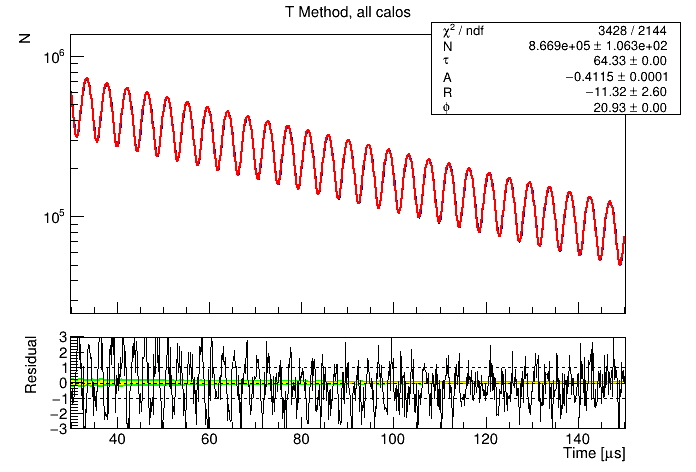

In [66]:
#The class calculates the  difference between the histogram and the fit function at each point 
#    and divides it by the uncertainty.
c3 = r.TCanvas()
allCaloWiggle.Draw()
c3.SetLogy()
c3.Draw()

rp1 = r.TRatioPlot(allCaloWiggle)
rp1.Draw()
rp1.GetLowerRefYaxis().SetTitle("Residual")
rp1.GetLowerRefYaxis().SetRangeUser(-3,3)

allCaloWiggle.GetXaxis().SetRangeUser(30,150)

c3.Update()
c3.Draw()
c3.Print("./images/"+prodString+"_TmethodWiggleFitAllCalos.png")

Fourier transform of the 5-parameter residuals.

4700
4700 699.9999999999999 -0.07446808510638298 699.9255319148936
0.14893617021276592 0.0014285714285714288
13.42857142857143 6.714285714285715


Info in <TCanvas::Print>: png file ./images/v9_05_00_5ParamResiduals.png has been created


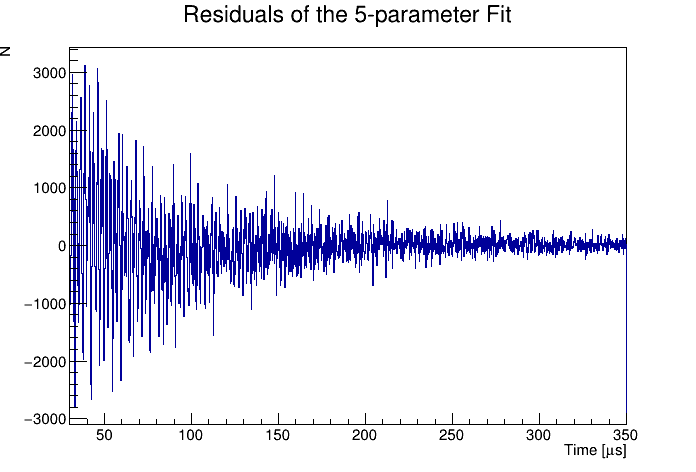

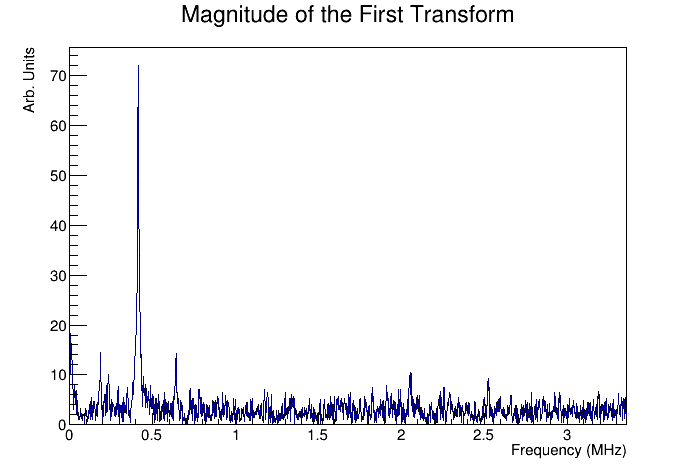

In [67]:
c3 = r.TCanvas()
residuals5param = residuals.Clone() # this will hold the residials from the 5-parameter fit
nBins = residuals5param.GetSize() - 2 #total number of bins excluding over/underflow
print(nBins)
for i in range(nBins):
    binCenterX = allCaloWiggle.GetXaxis().GetBinCenter(i)
    if (binCenterX > 30):
        residuals5param.SetBinContent(i, allCaloWiggle.GetBinContent(i) - func.Eval(binCenterX))
    else:
        residuals5param.SetBinContent(i, 0)

residuals5param.Draw()
residuals5param.GetXaxis().SetRangeUser(30,350)
residuals5param.SetTitle("Residuals of the 5-parameter Fit")
c3.Draw()
    
hxform = r.TH1D()
hxform = 0
r.TVirtualFFT.SetTransform(0)
hxform = residuals5param.FFT(hxform,"MAG P")
hxform.SetTitle("Magnitude of the First Transform")
#NOTE: for "real" frequencies you have to divide the x-axes range with the range of your function
#    y-axes has to be rescaled by a factor of 1/SQRT(n) to be right: this is not done automatically!
normXform = hxform.GetEntries()
hxform.Scale(1/normXform)
c2 = r.TCanvas()
c2.cd()
#c2.SetLogy()
hxform.GetXaxis().SetTitle("Frequency (MHz)")
hxform.GetYaxis().SetTitle("Arb. Units")
hxform.Draw("HIST P0 L")
c2.Draw()

Npart = residuals5param.GetSize() - 2
minBinCenter = residuals5param.GetXaxis().GetBinCenter(0)
maxBinCenter = residuals5param.GetXaxis().GetBinCenter(Npart)

capT = maxBinCenter - minBinCenter
print(Npart, capT, minBinCenter, maxBinCenter)
deltaT = capT/Npart #microseconds
deltaF = 1/capT
print(deltaT, deltaF)

deltaTns = deltaT*1000 #nanoseconds
limmaxHz = (1/(deltaTns*math.pow(10.0,-9)))
limmaxMHz = limmaxHz / math.pow(10,6)

limmax = 2*deltaF*Npart #400-25
print(limmax,limmaxMHz)
#hxform.GetXaxis().SetLimits(0,limmax)
nbins = residuals5param.GetSize() - 2
hxform.SetBins(Npart,0,limmaxMHz)
hxform.GetXaxis().SetRangeUser(0,limmaxMHz/2)

c2.Draw()
c2.Print("./images/"+prodString+"_5ParamResiduals.png")

Now lets make some plots from the individual calorimeters.

0.0 560000.0
0.0 700.0
0.0 560000.0
0.0 700.0
0.0 560000.0
0.0 700.0
0.0 560000.0
0.0 700.0
0.0 560000.0
0.0 700.0
0.0 560000.0
0.0 700.0
0.0 560000.0
0.0 700.0
0.0 560000.0
0.0 700.0
0.0 560000.0
0.0 700.0
0.0 560000.0
0.0 700.0
0.0 560000.0
0.0 700.0
0.0 560000.0
0.0 700.0
0.0 560000.0
0.0 700.0
0.0 560000.0
0.0 700.0
0.0 560000.0
0.0 700.0
0.0 560000.0
0.0 700.0
0.0 560000.0
0.0 700.0
0.0 560000.0
0.0 700.0
0.0 560000.0
0.0 700.0
0.0 560000.0
0.0 700.0
0.0 560000.0
0.0 700.0
0.0 560000.0
0.0 700.0
0.0 560000.0
0.0 700.0
0.0 560000.0
0.0 700.0
 FCN=3443.41 FROM MINOS     STATUS=SUCCESSFUL     36 CALLS         282 TOTAL
                     EDM=4.6082e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N            4.25873e+04   2.63264e+01  -1.97542e-03  -3.82659e-09
   2  #tau         6.43756e+01   2.22925e-02  -1.93263e-06  -1.59194e-06
  

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4
Info in <TCanvas::Print>: png file ./images/v9_05_00_calo01_FullSet.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4
Info in <TCanvas::Print>: png file ./images/v9_05_00_calo02_FullSet.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4
Info in <TCanvas::Print>: png file ./images/v9_05_00_calo03_FullSet.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4
Info in <TCanvas::Print>: png file ./images/v9_05_00_calo04_FullSet.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4
Info in <TCanvas::Print>: png file ./images/v9_05_00_calo05_FullSet.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4
Info in <TCanvas::Print>: png file ./images/v9_05_00_calo06_FullSet.png has been created
Warning in <TCanvas::Constructor>: Deleting ca

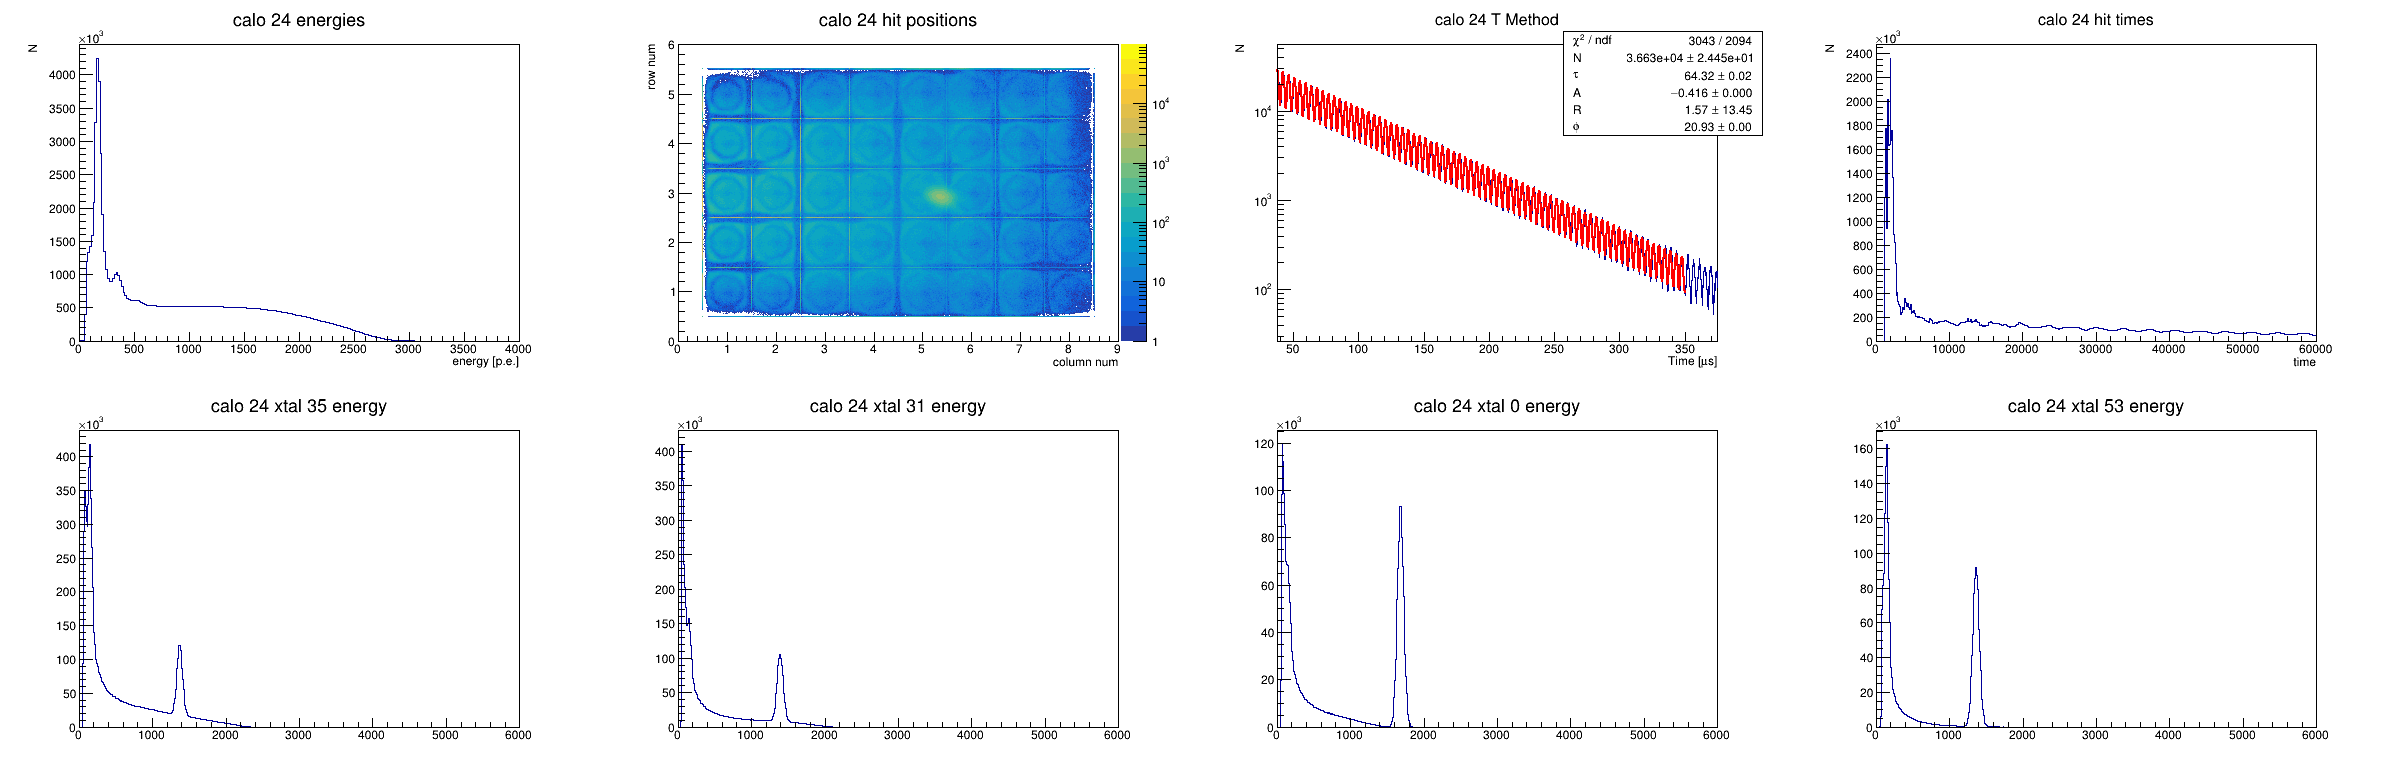

In [54]:
caloNum = 1
for caloNum in range(1,25):
    print("Starting Calo", caloNum)
    
    c4 = r.TCanvas("c4","c4",2400,800)
    c4.Divide(4,2)

    c4.cd(1)
    caloiEnergy = f.Get("farline").Get("calo"+str(caloNum)).Get("energy").Clone()
    caloiEnergy.Draw()
    c4.Draw()

    c4.cd(2)
    caloiXtalHits = f.Get("farline").Get("calo"+str(caloNum)).Get("hitPositions").Clone()
    caloiXtalHits.Draw("colz")
    r.gPad.SetLogz()

    c4.cd(3)
    caloiWiggle = f.Get("farline").Get("calo"+str(caloNum)).Get("wiggle").Clone()
    caloiWiggle.GetXaxis().SetRangeUser(30000,300000)
    caloiWiggle.Draw()
    r.gPad.SetLogy()

    caloiWiggle.GetXaxis().SetLimits(caloiWiggle.GetXaxis().GetXmin() / 1000 * 1.25,caloiWiggle.GetXaxis().GetXmax() / 1000 * 1.25)
    caloiWiggle.GetXaxis().SetTitle("Time [#mus]")
    
    caloiWiggle.Fit("func","REM")

    c4.cd(4)
    caloiTimes = f.Get("farline").Get("calo"+str(caloNum)).Get("times").Clone()
    caloiTimes.GetXaxis().SetRangeUser(0,60000)
    caloiTimes.Draw()

    c4.cd(5)
    caloiXtal35Energy = f.Get("farline").Get("calo"+str(caloNum)).Get("xtal35Energy").Clone()
    caloiXtal35Energy.Draw()

    c4.cd(6)
    caloiXtal31Energy = f.Get("farline").Get("calo"+str(caloNum)).Get("xtal31Energy").Clone()
    caloiXtal31Energy.Draw()

    c4.cd(7)
    caloiXtal0Energy = f.Get("farline").Get("calo"+str(caloNum)).Get("xtal0Energy").Clone()
    caloiXtal0Energy.Draw()

    c4.cd(8)
    caloiXtal53Energy = f.Get("farline").Get("calo"+str(caloNum)).Get("xtal53Energy").Clone()
    caloiXtal53Energy.Draw()

    c4.Draw()
    c4.Print("./images/"+prodString+"_calo"+str(caloNum).zfill(2)+"_FullSet.png")

If the eventTree exists (and we haven't deleted it to save space) then we can make plots of the energy/hit distribution in the file. These plots will eventually be replaced by dedicated versions in the CaloFarlineHistograms module.

In [12]:
try:
    t = f.Get("farline").Get("eventTree")
    t.Print()
    
    for i in range(1,25):    
        c3 = r.TCanvas()
        t.Draw("y:x","caloNum=="+str(i),"colz")
        c3.Draw()
        c3.Print("./images/hitDistribution_calo"+str(i).zfill(2)+".png")
    for i in range(1,25):    
        c3 = r.TCanvas()
        t.Draw("energy","caloNum=="+str(i)+" && energy < 6000","")
        c3.Draw()
        c3.Print("./images/energyByCalo_calo"+str(i).zfill(2)+".png")
    for i in range(1,25):    
        c3 = r.TCanvas()
        t.Draw("ctag","caloNum=="+str(i),"")
        c3.Draw()
        c3.Print("./images/ctag_calo"+str(i).zfill(2)+".png")
    
except:
    print("ERROR: eventTree not found. Likely using results_histOnly.root")

ERROR: eventTree not found. Likely using results_histOnly.root
